## Lab | Imbalanced data

**Instructions**
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1. Load and explore the dataset

In [2]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(data.shape)
print('------------')
data.isna().sum()/len(data)

(7043, 21)
------------


customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [4]:
for column in data.columns:
    print(column)
    print(data[column].value_counts())
    print('-------------')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
-------------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
-------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------
InternetService
Fiber optic    3096
DSL          

<Axes: xlabel='Churn', ylabel='count'>

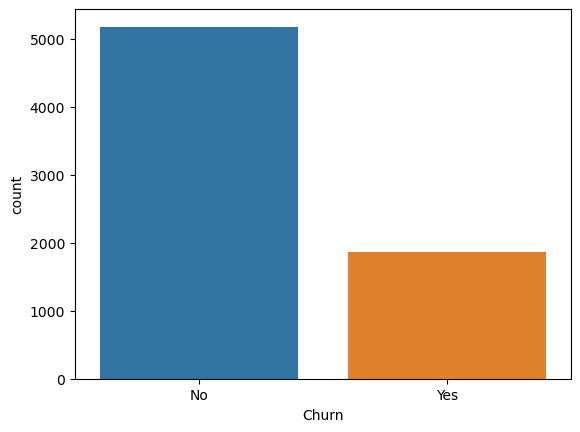

In [5]:
sns.countplot(data=data, x='Churn')

### 2. Extract the target and the independent variables and scale them.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Churn = le.fit_transform(data.Churn)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
# X/y split
y = data['Churn']
X = data[['tenure', 'SeniorCitizen' , 'MonthlyCharges']]

In [8]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [9]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [10]:
# before scaling, it is needed to do train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
transformer = StandardScaler()
transformer.fit(X_train)
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_train_scaled

,tenure,SeniorCitizen,MonthlyCharges
2142,-0.465683,-0.437749,-0.000474
1623,0.885537,-0.437749,1.074754
6074,-1.284605,-0.437749,-1.376499
1362,-1.161766,-0.437749,0.177346
6754,-1.325551,-0.437749,-0.098524
...,...,...,...
3772,-1.284605,-0.437749,1.001632
5191,-0.383791,-0.437749,0.872006
5226,-0.834198,-0.437749,-1.452945
5390,-0.834198,2.284413,1.149538


In [12]:
#Apply the same transformer to X_test
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns= X_train.columns, index=X_test.index)
X_test_scaled

,tenure,SeniorCitizen,MonthlyCharges
185,-1.284605,-0.437749,-1.331629
2715,0.353238,-0.437749,-1.316672
3825,0.803645,-0.437749,-1.512772
1807,-1.284605,-0.437749,0.381756
132,1.417836,-0.437749,-0.475768
...,...,...,...
6366,1.294997,-0.437749,0.114195
315,0.762699,-0.437749,1.501854
2439,-0.629468,-0.437749,-1.494492
5002,1.499728,-0.437749,-0.695134


### 3. Build the logistic regression model; evaluate the model.

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [14]:
predictions_train = lr.predict(X_train_scaled)
predictions_train

array([0, 0, 0, ..., 0, 1, 0])

In [15]:
predictions_test = lr.predict(X_test_scaled)
predictions_test

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(lr.score(X_train_scaled, y_train)))

The accuracy of the model in the TRAIN set is: 0.79


In [17]:
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.81


In [18]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,predictions_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,predictions_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,predictions_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,predictions_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,predictions_test)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.70
The recall in the TEST set is: 0.49
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.45


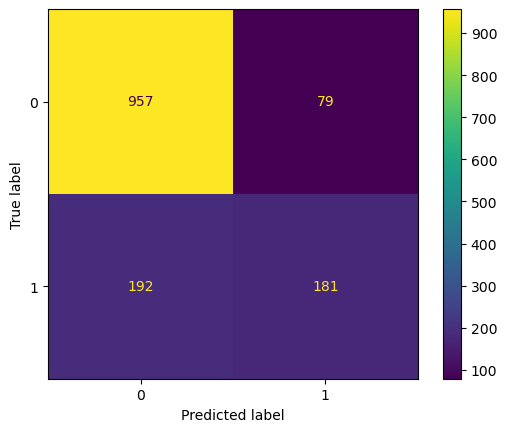

In [19]:
cm_test = confusion_matrix(y_test,predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### 4. Apply SMOTE to the dataset; evaluate model

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE(random_state=42, k_neighbors=5)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

In [22]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8276, 3)


In [23]:
y_train_SMOTE.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.77
The F1 in the TEST set is: 0.62
The Kappa in the TEST set is: 0.44


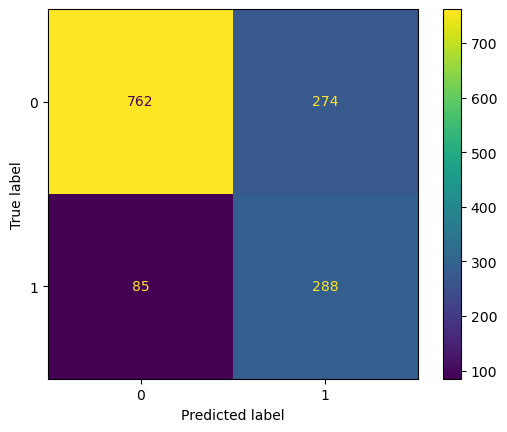

In [25]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### 5. Apply SMOTE to the dataset; evaluate model

In [26]:
from imblearn.under_sampling import TomekLinks

In [27]:
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_scaled, y_train)

In [28]:
lr_tomek = LogisticRegression(random_state=0, solver='lbfgs')
lr_tomek.fit(X_train_tomek, y_train_tomek)

LogisticRegression(random_state=0)

In [29]:
y_pred_tomek = lr_tomek.predict(X_test_scaled)

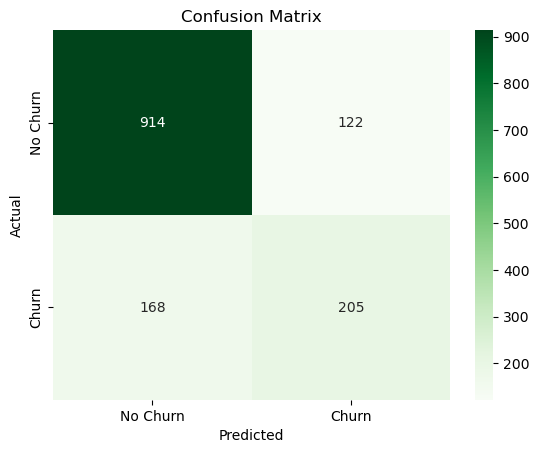

In [30]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tomek)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['No Churn', 'Churn'])
plt.yticks([0.5, 1.5], ['No Churn', 'Churn'])

# Display the plot
plt.show()

In [31]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_tomek)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_tomek)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_tomek)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_tomek)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_tomek)))

The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.63
The recall in the TEST set is: 0.55
The F1 in the TEST set is: 0.59
The Kappa in the TEST set is: 0.45
